# POL-2 Half Vectors Analysis

Working on producing various comparion plots of the half-vectors of the Jellyfish - going region by region. I need to also note/deal with the 0/180 degeneracy that occurs. Also need to ensure I rotate angles by 90degrees. 

see: http://www.astropy.org/astropy-tutorials/plot-catalog.html

and 

see: https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size


angle wrapping:

see: http://docs.astropy.org/en/stable/coordinates/angles.html

In [1]:
import os

import matplotlib as mpl ### conda update matplotlib
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.io import ascii
from astropy.visualization import ImageNormalize, SqrtStretch
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxesSubplot
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle


from astropy.table import Table, Column, vstack
import astropy.units as u
import numpy as np
import aplpy


import matplotlib.cm as cm
from matplotlib.pyplot import figure, show, rc


/Users/hparsons/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
%matplotlib inline

In [3]:
# want to make calculating and adding l and b into a mathod:

def calculate_lb(self):   # calculate l and b is a method
    '''calculate the l and b from a generic POL-2 vector catalog containing RA and DEC'''
    ldeg = []
    bdeg = []
    for x in range(len(self['X'])):
        rarad = self['RA'][x]*u.radian
        decrad = self['DEC'][x]*u.radian
        c = SkyCoord(rarad, decrad).galactic
        l = c.l.deg
        b = c.b.deg
        ldeg.append(l)
        bdeg.append(b)
        
    ldeg = Column(ldeg, name='ldeg')
    bdeg = Column(bdeg, name='bdeg')

    try:
        if self['ldeg'].any:
            print ('column exists (ldeg)')
    except:
        print ('column does not exist')
        self.add_columns([ldeg])
        print ('added fileprovided[ldeg]')

    try:
        if self['bdeg'].any:
            print ('column exists (bdeg)')
    except:
        print ('column does not exist')
        self.add_columns([bdeg])
        print ('added fileprovided[bdeg]')   
#     return self



# want to make calculating the B angle into a method:

def calculate_bang(self,selfname): # calculates the B angle (POL-2 angle + 90)
    '''calculate the B angle from POL-2 vector catalog containing ANG (simply add 90)'''
    bang = []
    for x in range(len(self['X'])):
        ang = self['ANG'][x]
        if selfname == 'BellTop' or selfname == 'Leg3a' or selfname == 'Leg4a' or selfname == 'Leg3aa' or selfname == 'Leg3b':
            if ang > 45.0:
                newang = ang-90.0 # Wrapping at 45degree in ANG - chosen arbitarily. 
            else:
                newang = ang+90.0
        else:
            newang = ang+90.0
        bang.append(newang)
    bang = Column(bang, name='bang')    
    try:
        if self['bang'].any:
            print ('column exists (bang)')
    except:
        self.add_columns([bang])
        print ('added fileprovided[bang]')
#     return self

## Input files

In [9]:

try:
    print ("running on mac")

    pol2path450 = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/POL2/450/'
    pol2path850 = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/POL2/850/'
    filamentpath = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/POL2/ClumpfindFilaments/'
    
    BellTop3 = pol2path850 + 'ard_Bell-Top-selcat-3-3-3.FIT'
    BellTop5 = pol2path850 + 'ard_Bell-Top-selcat-5-5-5.FIT'

    Leg1a3 = pol2path850 + 'ard_Leg-1a-selcat-3-3-3.FIT'
    Leg1a5 = pol2path850 + 'ard_Leg-1a-selcat-5-5-5.FIT'
    Leg1b3 = pol2path850 + 'ard_Leg-1b-selcat-3-3-3.FIT'
    Leg1b5 = pol2path850 + 'ard_Leg-1b-selcat-5-5-5.FIT'
    Leg2a3 = pol2path850 + 'ard_Leg-2a-selcat-3-3-3.FIT'
    Leg2a5 = pol2path850 + 'ard_Leg-2a-selcat-5-5-5.FIT'
    Leg2b3 = pol2path850 + 'ard_Leg-2b-selcat-3-3-3.FIT'
    Leg2b5 = pol2path850 + 'ard_Leg-2b-selcat-5-5-5.FIT'
    Leg3a3 = pol2path850 + 'ard_Leg-3a-selcat-3-3-3.FIT'
    Leg3a5 = pol2path850 + 'ard_Leg-3a-selcat-5-5-5.FIT'
    
    Leg3aa3 = pol2path850 + 'ard_Leg-3aa-selcat-3-3-3.FIT'
    Leg3aa5 = pol2path850 + 'ard_Leg-3aa-selcat-5-5-5.FIT'
    Leg3b3 = pol2path850 + 'ard_Leg-3b-selcat-3-3-3.FIT'
    Leg3b5 = pol2path850 + 'ard_Leg-3b-selcat-5-5-5.FIT'
    
    Leg4a3 = pol2path850 + 'ard_Leg-4a-selcat-3-3-3.FIT'
    Leg4a5 = pol2path850 + 'ard_Leg-4a-selcat-5-5-5.FIT'
    Leg5a3 = pol2path850 + 'ard_Leg-5a-selcat-3-3-3.FIT'
    Leg5a5 = pol2path850 + 'ard_Leg-5a-selcat-5-5-5.FIT'

    BrightBlue3 = pol2path850 + 'ard_Outflow-Birght-Blue-selcat-3-3-3.FIT'
    BrightBlue5 = pol2path850 + 'ard_Outflow-Birght-Blue-selcat-5-5-5.FIT'
    BrightRed3 = pol2path850 + 'ard_Outflow-Birght-Red-selcat-3-3-3.FIT'
    BrightRed5 = pol2path850 + 'ard_Outflow-Birght-Red-selcat-5-5-5.FIT'
    Faint3 = pol2path850 + 'ard_Outflow-Faint-selcat-3-3-3.FIT'
    Faint5 = pol2path850 + 'ard_Outflow-Faint-selcat-5-5-5.FIT'
    
    All3 = pol2path850 + 'selcat-3-3-3.FIT'
    All5 =pol2path850 + 'selcat-5-5-5.FIT'
    
    Filament_Leg1a = filamentpath + 'Poly-Leg-1a-clumps.FIT'
    Filament_Leg2a = filamentpath + 'Poly-Leg-2a-clumps.FIT'
    Filament_Leg3a = filamentpath + 'Poly-Leg-3a-clumps.FIT'
    Filament_Leg3aa = filamentpath + 'Poly-Leg-3aa-clumps.FIT'
    Filament_Leg3b = filamentpath + 'Poly-Leg-3b-clumps.FIT'
    Filament_Leg4a = filamentpath + 'Poly-Leg-4a-clumps.FIT'
    
except:
    print ("running on kukui")

running on mac


In [10]:
#fits_image_filename = fits.util.get_testdata_filepath('test0.fits')

# pick 3 sigma or 5 sigma

sigmaclip = 3

if sigmaclip == 3:

    vectors_All = Table.read(All3)
    vectors_AllOSC = Table.read(All5) # Other Sigma Clip

    vectors_BellTop = Table.read(BellTop3)
    vectors_BrightBlue = Table.read(BrightBlue3)
    vectors_BrightRed = Table.read(BrightRed3)
    vectors_Faint =  Table.read(Faint3)

    vectors_Leg1a = Table.read(Leg1a3)
    vectors_Leg2a = Table.read(Leg2a3)
    vectors_Leg1b = Table.read(Leg1b3)
    vectors_Leg2b = Table.read(Leg2b3)
    vectors_Leg3a = Table.read(Leg3a3)
    vectors_Leg3aa = Table.read(Leg3aa3)
    vectors_Leg3b = Table.read(Leg3b3)
    vectors_Leg4a = Table.read(Leg4a3)
    vectors_Leg5a = Table.read(Leg5a3)
    
elif sigmaclip == 5:
    
    vectors_All = Table.read(All5)
    vectors_AllOSC = Table.read(All3)

    vectors_BellTop = Table.read(BellTop5)
    vectors_BrightBlue = Table.read(BrightBlue5)
    vectors_BrightRed = Table.read(BrightRed5)
    vectors_Faint =  Table.read(Faint5)

    vectors_Leg1a = Table.read(Leg1a5)
    vectors_Leg2a = Table.read(Leg2a5)
    vectors_Leg1b = Table.read(Leg1b5)
    vectors_Leg2b = Table.read(Leg2b5)
    vectors_Leg3a = Table.read(Leg3a5)
    vectors_Leg3aa = Table.read(Leg3aa5)
    vectors_Leg3b = Table.read(Leg3b5)
    vectors_Leg4a = Table.read(Leg4a5)
    vectors_Leg5a = Table.read(Leg5a5)    

In [11]:
calculate_lb(vectors_All)
calculate_lb(vectors_AllOSC)

calculate_lb(vectors_BellTop)
calculate_lb(vectors_BrightBlue)
calculate_lb(vectors_BrightRed)
calculate_lb(vectors_Faint)

calculate_lb(vectors_Leg1a)
calculate_lb(vectors_Leg2a)
calculate_lb(vectors_Leg1b)
calculate_lb(vectors_Leg2b)
calculate_lb(vectors_Leg3a)
calculate_lb(vectors_Leg3aa)
calculate_lb(vectors_Leg3b)
calculate_lb(vectors_Leg4a)
calculate_lb(vectors_Leg5a)

calculate_bang(vectors_All,'All')
calculate_bang(vectors_AllOSC,'AllOSC')

calculate_bang(vectors_BellTop,'BellTop')
calculate_bang(vectors_BrightBlue,'BrightBlue')
calculate_bang(vectors_BrightRed,'BrightRed')
calculate_bang(vectors_Faint,'Faint')

calculate_bang(vectors_Leg1a,'Leg1a')
calculate_bang(vectors_Leg2a,'Leg2a')
calculate_bang(vectors_Leg1b,'Leg1b')
calculate_bang(vectors_Leg2b,'Leg2b')
calculate_bang(vectors_Leg3a,'Leg3a')
calculate_bang(vectors_Leg3aa,'Leg3aa')
calculate_bang(vectors_Leg3b,'Leg3b')
calculate_bang(vectors_Leg4a,'Leg4a')
calculate_bang(vectors_Leg5a,'Leg5a')

column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does n

# Create table containing all vectors of defined regions

In [12]:
#Want a vectors_regions - which is a coadd of all the data from all the identified regions.

vectors_AllRegions = vstack([vectors_Leg1a, vectors_Leg2a, vectors_Leg1b, vectors_Leg2b,
                              vectors_Leg3aa,vectors_Leg3b,vectors_Leg4a,vectors_Leg5a,
                              vectors_BellTop,vectors_BrightBlue,vectors_BrightRed,vectors_Faint])
# vectors_all_regions


vectors_AllLegs = vstack([vectors_Leg1a, vectors_Leg2a,
                              vectors_Leg3aa,vectors_Leg3b,vectors_Leg4a])#,vectors_Leg5a])

vectors_AllOutflows = vstack([vectors_BrightBlue,vectors_BrightRed])

vectors_AllOther = vstack([vectors_Leg1b, vectors_Leg2b,vectors_Faint])


## checking vector locations:

In [13]:
def plot_vector_location(self,selfname):   #  ,selfname,outname
    '''plots vector locationf of one or more 
    regions as provided by self with label for 
    plot provided by selfname
    '''
    i=0
    xvalue = 'ldeg'
    yvalue = 'bdeg'
    for x in range(len(self)):
        i=i+1
        vectorfile = self[x]
        regionlabel = selfname[x]

        x = vectorfile[xvalue]
        y = vectorfile[yvalue]

#     if i == 1:
#         colordot = 'orange'
#     if     
    plt.figure()
    plt.scatter(x, y, marker='o',  s=50, label=regionlabel)

    plt.xlabel('l')
    plt.ylabel('b')

    plt.legend()

    plt.gca().invert_xaxis()

In [14]:
# regionlist = (vectors_AllRegions,)
# namelist = ('All',)

# plot_vector_location(regionlist,namelist)

# Filament Fitting

In [15]:
filament_Leg1a = Table.read(Filament_Leg1a)
filament_Leg2a = Table.read(Filament_Leg2a)
filament_Leg3a = Table.read(Filament_Leg3a)
filament_Leg3aa = Table.read(Filament_Leg3aa)
filament_Leg3b = Table.read(Filament_Leg3b)
filament_Leg4a = Table.read(Filament_Leg4a)

filament_Leg1a_u = filament_Leg1a[filament_Leg1a['PIDENT'] < 6.5] # needs work
# filament_Leg1a_u

In [16]:

def filamet_angle(self,selfname): # calculates the B angle (POL-2 angle + 90)
    '''fitting and plotting filamets as defined by clumpfind'''

    plt.figure()
    plt.plot(self['Peak1'],self['Peak2'],marker='x',linestyle='None',label=selfname)

    xvalues = self['Peak1']
    yvalues = self['Peak2']

    z = np.polyfit(xvalues, yvalues, 1) # z,cov - > diag off the 
    f = np.poly1d(z)

#    print (z,f)
    c = f[0]
    a = f[1]

#    print (a,c)
    x1 = min(xvalues)
    x2 = max(xvalues)
    y1 = (a * x1) + c
    y2 = (a * x2) + c

    # POL-2 Angle Theta is defined as East from North - so values presented here ARE CORRECT FOR ASTRONOMY!
    
    theta = np.degrees(np.arctan((y2-y1)/(x2-x1)))
    thetapol2 = theta

    
    Astronomicalthetapol2 = (-1*thetapol2)+90.0# accounting for astronomical coordinates and POL-2 angle definitions (0deg=North increasing East)

    
        
    plt.plot([x1,x2],[y1,y2],marker='x',linestyle='-',label='{:.0f}'.format(Astronomicalthetapol2))
    plt.legend()#loc='upper right')
    plt.gca().invert_xaxis()
    
    
    print (Astronomicalthetapol2)    
    return Astronomicalthetapol2


149.3542721550828
159.057466575256
134.73004123641206
93.44178719945981
122.94453113505894
21.803414331138427


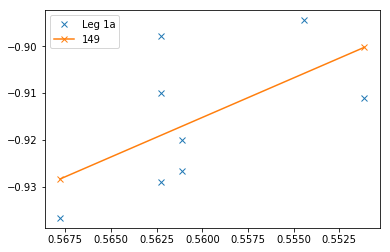

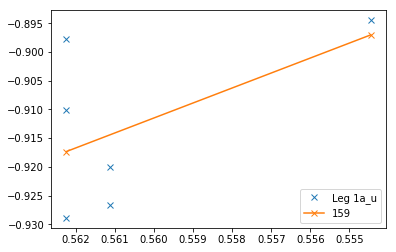

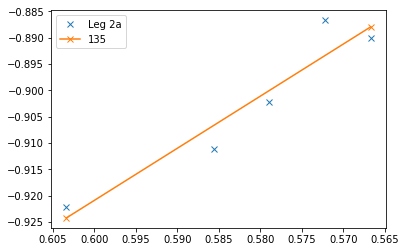

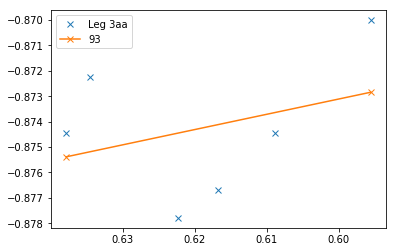

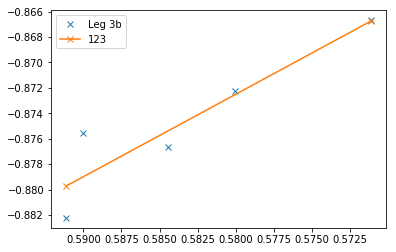

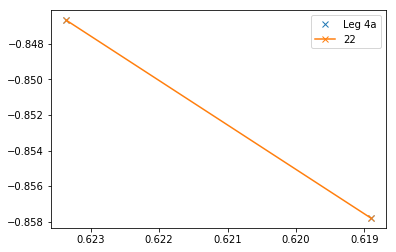

In [17]:
thetapol2_Leg1a = filamet_angle(filament_Leg1a,'Leg 1a')   ##### ISSUE
thetapol2_Leg1a_u = filamet_angle(filament_Leg1a_u,'Leg 1a_u')   ##### ISSUE
thetapol2_Leg2a = filamet_angle(filament_Leg2a,'Leg 2a')
thetapol2_Leg3aa = filamet_angle(filament_Leg3aa,'Leg 3aa')   ##### ISSUE
thetapol2_Leg3b = filamet_angle(filament_Leg3b,'Leg 3b')
thetapol2_Leg4a = filamet_angle(filament_Leg4a,'Leg 4a')

In [18]:
print (thetapol2_Leg2a)
print (thetapol2_Leg4a)

134.73004123641206
21.803414331138427


## Plotting B half vector angles

see: http://docs.astropy.org/en/stable/coordinates/angles.html

In [19]:
# DO a method where self is a lit of vectors_Leg1a, vectors_Leg2a and selfnames is a list of 'Leg 1', 'Leg 2'

def plot_angles_hist(self,selfname,variable,outname):   # calculate l and b is a method
    '''plots hitograms of one or more data sets of the angles, where variable can be ANG or bang'''
    
    anlgevariable = variable
    outfilename = outname
    
    if anlgevariable=='bang':
        histrange = (-40.0,180.0)
    elif anlgevariable=='ANG':
        histrange = (-90.0,90.0)
        
    plt.figure()
    plt.figure(figsize=(10,6))
    for x in range(len(self)):
        vectorfile = self[x]
        vectorlabel = selfname[x]
        
        if x == 0: 
            pltlinestyle = '-'
        if x == 1:
            pltlinestyle = '--'

        plt.hist(vectorfile[variable], range=histrange, label=vectorlabel, histtype='step',linestyle=pltlinestyle)
        plt.xlabel('Angle ($^{\circ}$)')
        plt.ylabel('Number')
        plt.title(variable+' inspection')
        plt.legend()#loc='upper right')
        
        print ('{} ({}) = {:.1f} std = {:.1f}'.format(vectorlabel,anlgevariable,np.median(vectorfile[variable]),np.std(vectorfile[variable])))

    
    try: # if on mac save here:
        plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-'+anlgevariable+'-'+outfilename+'.pdf')
        plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-'+anlgevariable+'-'+outfilename+'.png')
    except: # if on kukui save here:
        plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-'+anlgevariable+'-'+outfilename+'.pdf')
        plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-'+anlgevariable+'-'+outfilename+'.png')
 

In [20]:
# filelist = (vectors_Leg1a,vectors_Leg2a)
# namelist = ('Leg 1','Leg 2')
# plot_angles_hist(filelist,namelist,'bang','legs12')

# filelist = (vectors_Leg1b,vectors_Leg2b)
# namelist = ('Connector 1','Connector 2')
# plot_angles_hist(filelist,namelist,'bang','legs12')

In [21]:
# filelist = (vectors_Leg3aa, vectors_Leg3b)
# namelist = ('Leg 3aa','Leg 3b')
# plot_angles_hist(filelist,namelist,'bang','legs3aab')

# filelist = (vectors_Leg4a,vectors_Leg5a)
# namelist = ('Leg 4','Leg 5')
# plot_angles_hist(filelist,namelist,'bang','legs45')

In [22]:
# filelist = (vectors_BrightBlue, vectors_BrightRed)
# namelist = ('Blue Outflow','Red Outflow')
# plot_angles_hist(filelist,namelist,'bang','outflow')

# filelist = (vectors_BellTop,vectors_Faint)
# namelist = ('Bell Top*','Bell Bottom (Faint)**')
# plot_angles_hist(filelist,namelist,'bang','Bell')

## Errors

In [30]:
vectors_All

X,Y,RA,DEC,I,DI,Q,DQ,U,DU,P,DP,ANG,DANG,PI,DPI,ldeg,bdeg,bang
pix,pix,RADIANS{HOURS},RADIANS{DEGREES},mJy / beam,mJy / beam,mJy / beam,mJy / beam,mJy / beam,mJy / beam,%,%,Degrees,Degrees,mJy / beam,mJy / beam,,,
float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64
-0.5,-21.5,4.671439551425891,-0.5052702739560346,90.42943,3.3536758,0.48448893,2.0225484,6.6466203,1.9029447,7.0625196,2.1227312,42.915466,8.69177,6.386596,1.9035965,0.5527966867610792,-0.9427913884806888,132.91546630859375
-2.5,-19.5,4.671393430160055,-0.5051107476878788,90.769196,2.2121665,9.114913,2.0350242,3.8943682,1.4862653,10.704302,2.176062,11.567355,4.5764847,9.716208,1.9603662,0.5594642990269134,-0.9361246608348612,101.56735515594482
-0.5,-19.5,4.671325339506081,-0.505210689258371,98.05533,3.2804167,3.5301194,1.9632832,-4.04451,1.0538663,5.252159,1.5564843,-24.442484,8.716516,5.150022,1.5156118,0.5527966819097367,-0.9361246723958833,65.55751609802246
-2.5,-18.5,4.67133632905067,-0.5050809549017148,125.80642,3.1227453,5.9456415,1.2442849,-1.4900084,1.8560606,4.7632966,1.0313363,-7.0344353,8.532522,5.992533,1.2885361,0.559464290710452,-0.9327913021512533,82.9655647277832
-4.5,-17.5,4.671347317019737,-0.5049512204823615,65.12783,2.3710265,-4.9837394,1.6455917,-3.882052,1.9275973,9.316918,2.72141,-71.04171,8.281671,6.067907,1.7574105,0.5661318874737352,-0.9294579189795301,18.958290100097656
-1.5,-17.5,4.671245183390351,-0.5051011301208937,42.161423,2.101413,6.775951,1.466402,-0.3632503,1.198842,15.714588,3.5677648,-1.5343089,5.064886,6.6254935,1.465705,0.5561304797468885,-0.929457950354879,88.46569108963013
0.5,-17.5,4.671177084894765,-0.5052010674292422,41.703556,2.077753,-4.869722,1.7430658,4.147028,1.8784311,14.71673,4.3861513,69.79123,8.163852,6.1374,1.801208,0.5494628743511043,-0.9294579555407043,159.79122924804688
1.5,-17.5,4.6711430328239425,-0.5052510353469446,27.269714,2.1421425,-5.196949,1.4341848,-0.56647825,1.584028,18.433002,5.4771333,-86.889595,8.671258,5.026627,1.4360349,0.5461290716475897,-0.9294579534143401,3.1104049682617188


median DP = 0.6592262983322144


<Figure size 432x288 with 0 Axes>

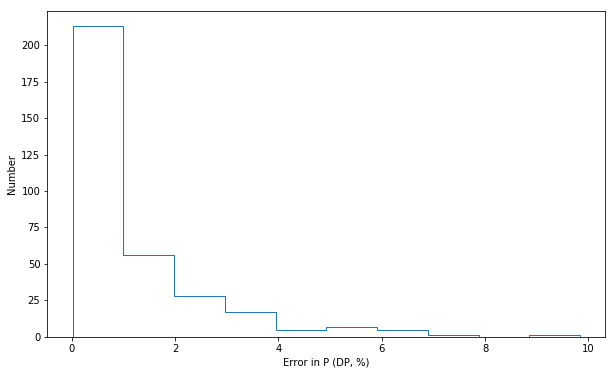

In [33]:
variable = 'DP'

plt.figure()
plt.figure(figsize=(10,6))
plt.hist(vectors_All[variable], label='All', histtype='step')
plt.xlabel('Error in P (DP, %)')
plt.ylabel('Number')

print ('median DP = {}'.format(np.median(vectors_All[variable])))


try: # if on mac save here:
    plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-error-in-B-dp.pdf')
    plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-error-in-B-dp.png')
except: # if on kukui save here:
    plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-error-in-B-dp.pdf')
    plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-error-in-B-dp.png')
    


Text(0,0.5,'DP')

<Figure size 432x288 with 0 Axes>

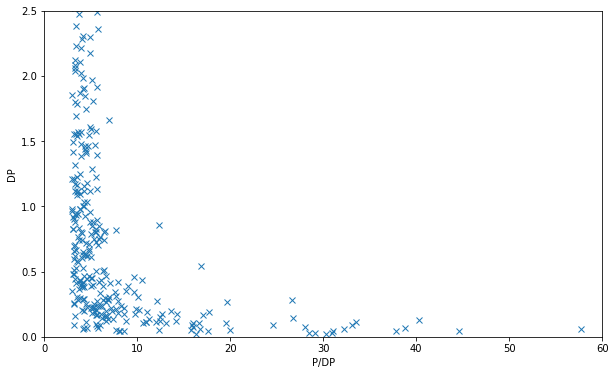

In [51]:
plt.figure()
plt.figure(figsize=(10,6))

plt.plot(vectors_All['P']/vectors_All['DP'],vectors_All['DP'],marker='x',linestyle='None')
plt.ylim([0,2.5])
plt.xlim([0,60])
plt.xlabel('P/DP')
plt.ylabel('DP')

median DANG = 6.050469398498535


<Figure size 432x288 with 0 Axes>

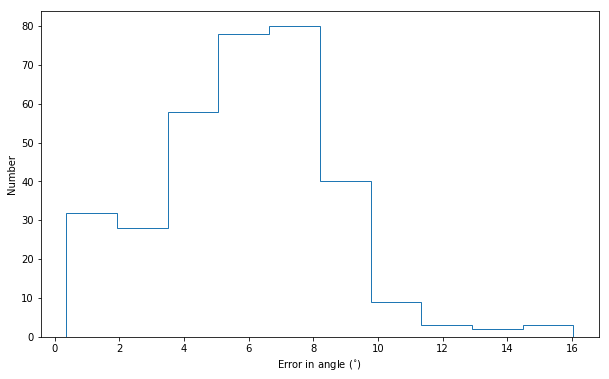

In [23]:
variable = 'DANG'

plt.figure()
plt.figure(figsize=(10,6))
plt.hist(vectors_All[variable], label='All', histtype='step') 
plt.xlabel('Error in angle ($^{\circ}$)')
plt.ylabel('Number')

print ('median DANG = {}'.format(np.median(vectors_All[variable])))


try: # if on mac save here:
    plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-error-in-B-angles.pdf')
    plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-error-in-B-angles.png')
except: # if on kukui save here:
    plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-error-in-B-angles.pdf')
    plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-error-in-B-angles.png')
    


# Polar plots

In [21]:
# Steve suggested polar plot: this is known as a rose diagram.
# DO a method where self is a lit of vectors_Leg1a, vectors_Leg2a and selfnames is a list of 'Leg 1', 'Leg 2'

def plot_angles_polar(self,outname):   #  ,selfname,outname
    '''plots polar distribution of magnetci field angles
    where self is a table containing the vectors you wish to plot 
    i.e vectors_Leg3aa,vectors_Leg3b
    '''
    i=0
    outfilename = outname
    for x in range(len(self)):
        i=i+1
        vectorfile = self[x]
        angles = vectorfile['bang'] # angle either from POL-2 rotated by 90dgrees
###         dangles =  vectorfile['DANG'] # error in angles
###         percentage = vectorfile['P']
 
        aglebinwidth_deg = 10###5 ####
        anglebinwidth_rad = np.radians(aglebinwidth_deg)
        anglebinwidth_rad_list = np.array([anglebinwidth_rad for i in range(5,185,aglebinwidth_deg)]) # widths for each bin

        anglebins_deg = [i for i in range(0,185,aglebinwidth_deg)] # bins every 5 degrees
    
        theta_deg = [i+2.5 for i in range(0,180,aglebinwidth_deg)] # middle of bin
        theta_radians = np.array(np.radians(theta_deg)) # middle of bin in radians

#     print ('\nangles for bin edges in degrees: {}'.format(anglebins_deg))
#     print ('\nangles for bin edges in radians: {}'.format(anglebins_rad))
#     print ('\nangles for plotting in radians {}'.format(theta_radians ))
#     print ('\nWidths of bins in radians: {}'.format(anglebinwidth_rad_list))

        wholeanglevalue = []
        for y in range(len(angles)): # want angles in whole numbers for histogram tool
            anglevalue = np.int(format(angles[y], '.0f'))
            wholeanglevalue.append(anglevalue)

#     print ('\narray of POL-2 angles {}'.format(wholeanglevalue))
        
        hisout = np.histogram(wholeanglevalue, bins=anglebins_deg) # creat histogram from data for each specified bin interval
        
        angle_frequency = hisout[0] # this is our output
        angle_bins = hisout[1] # this was our input

#         print (np.max(angle_frequency))

#     print ('\nangle frequency = {}'.format(angle_frequency))


        theta = theta_radians
        radii = angle_frequency
        widths = anglebinwidth_rad_list

#     print ('\nlength of arrays = {} {} {}'.format(len(theta), len(radii), len(width)))
#     print ('\ntype of arrays = {} {} {}'.format(type(theta), type(radii), type(width)))

        if i == 1:
            theta1 = theta
            radii1 = radii
            barcolor1 = 'teal'
            
            
            locationthetaL1a = np.radians(thetapol2_Leg1a) # here seeing if I can plot location of filament legs
            locationthetaL2a = np.radians(thetapol2_Leg2a)
            locationthetaL3aa = np.radians(thetapol2_Leg3aa)
            locationthetaL3b = np.radians(thetapol2_Leg3b)
            locationthetaL4a = np.radians(thetapol2_Leg4a)
            
            
            location90thetaL1a = np.radians(thetapol2_Leg1a-90) # filament legs rotated by 90
            location90thetaL2a = np.radians(thetapol2_Leg2a-90) 
            location90thetaL3aa = np.radians(thetapol2_Leg3aa-90)
            location90thetaL3b = np.radians(thetapol2_Leg3b-90)
            location90thetaL4a = np.radians(thetapol2_Leg4a+90)
#             location90thetaL5a = np.radians(thetapol2_Leg5a-90)

            
#             locationthetaL5a = np.radians(thetapol2_Leg5a)
            locationradii = np.max(angle_frequency)
            
        if i == 2:
            theta2 = theta
            radii2 = radii        
            barcolor2 = 'goldenrod'
        if i == 3:
            theta3 = theta
            radii3 = radii        
            barcolor3 = 'green'
        if i == 4:
            theta4 = theta
            radii4 = radii        
            barcolor4 = 'darkorchid'            


        
    fig = figure(figsize=(11,11))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True) # l,b,w,h


    
    bars = ax.bar(theta1, radii1, width=widths*0.9, bottom=0.0,color=barcolor1,alpha=0.2) # at minimum I will show one dataset
    ax.set_thetamin(-5)
    ax.set_thetamax(185)
    ax.set_theta_zero_location('N')
    ax.set_rmax(20) ### CAN THIS WORK?
    
    if i > 1:
        bars = ax.bar(theta2, radii2, width=widths*0.9, bottom=0.0,color=barcolor2,alpha=0.7)
        
        colourleg = 'black'
        colorleg90 = 'grey'
        alphaleg = 1.0
        alphaleg90 = 0.5   
        
        
        colourleg = 'grey'
        colorleg90 = 'black'
        alphaleg = 0.5
        alphaleg90 = 1.0
        
#         # showing location of the legs
#         bars = ax.bar(locationthetaL1a,(locationradii*0.2), width=0.02, bottom=(locationradii*0.8),color=colourleg,alpha=alphaleg) 
#         bars = ax.bar(locationthetaL2a,(locationradii*0.2), width=0.02, bottom=(locationradii*0.8),color=colourleg,alpha=alphaleg)
#         bars = ax.bar(locationthetaL3aa,(locationradii*0.2), width=0.02, bottom=(locationradii*0.8),color=colourleg,alpha=alphaleg)
#         bars = ax.bar(locationthetaL3b,(locationradii*0.2), width=0.02, bottom=(locationradii*0.8),color=colourleg,alpha=alphaleg)
# #         bars = ax.bar(locationthetaL4a,(locationradii*0.2), width=0.02, bottom=(locationradii*0.8),color=colourleg,alpha=alphaleg)
        
#         bars = ax.bar(location90thetaL1a,(locationradii*0.2), width=0.02, bottom=(locationradii*0.8),color=colorleg90,alpha=alphaleg90) 
#         bars = ax.bar(location90thetaL2a,(locationradii*0.2), width=0.02, bottom=(locationradii*0.8),color=colorleg90,alpha=alphaleg90)
#         bars = ax.bar(location90thetaL3aa,(locationradii*0.2), width=0.02, bottom=(locationradii*0.8),color=colorleg90,alpha=alphaleg90)
#         bars = ax.bar(location90thetaL3b,(locationradii*0.2), width=0.02, bottom=(locationradii*0.8),color=colorleg90,alpha=alphaleg90)
# #         bars = ax.bar(location90thetaL4a,(locationradii*0.2), width=0.02, bottom=(locationradii*0.8),color='grey',alpha=alphaleg90) 

#         bars = ax.bar(locationthetaL5a,locationradii, width=0.02, bottom=0.0,color='saddlebrown',alpha=0.8)
        

    if i >2:
        bars = ax.bar(theta3, radii3, width=widths*0.9, bottom=0.0,color=barcolor3,alpha=0.7,label='dk')    

    if i >3:
        bars = ax.bar(theta4, radii4, width=widths*0.9, bottom=0.0,color=barcolor4,alpha=0.7,label='dk')    

    if i >4:
        bars = ax.bar(theta5, radii5, width=widths*0.9, bottom=0.0,color=barcolor5,alpha=0.7,label='dk')    

  
    try: # if on mac save here:
        plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-bang-polar-'+outfilename+'.pdf')
        plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-bang-polar-'+outfilename+'.png')
    except: # if on kukui save here:
        plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-bang-'+outfilename+'.pdf')
        plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-bang-polar-'+outfilename+'.png')
    
    show()

79.66138362884521
91.10679717361927


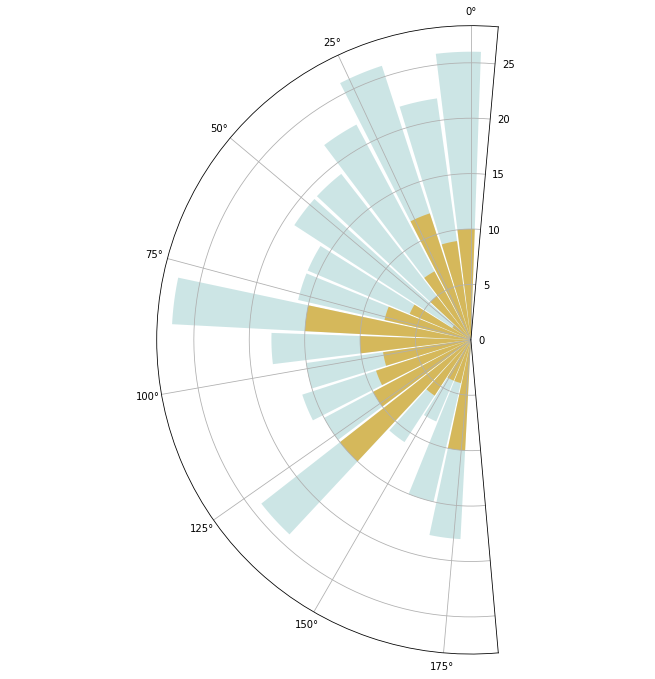

In [22]:
print (np.median(vectors_All['bang']))
print (np.median(vectors_AllOSC['bang']))

listoffiles = (vectors_All,vectors_AllOSC,)
plot_angles_polar(listoffiles,'All3-All5')

79.66138362884521
59.10002136230469


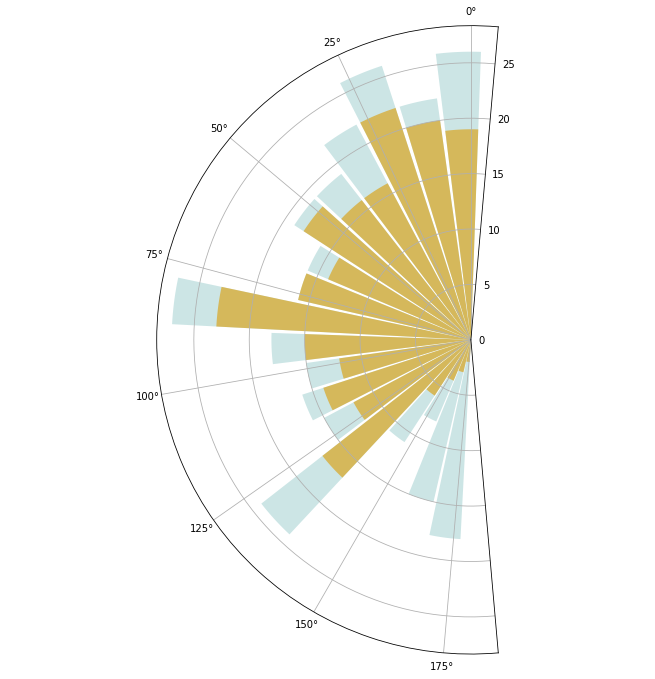

In [23]:
print (np.median(vectors_All['bang']))
print (np.median(vectors_AllRegions['bang']))

listoffiles = (vectors_All,vectors_AllRegions)
plot_angles_polar(listoffiles,'All-Selected')

44.22154235839844
31.461031378361877


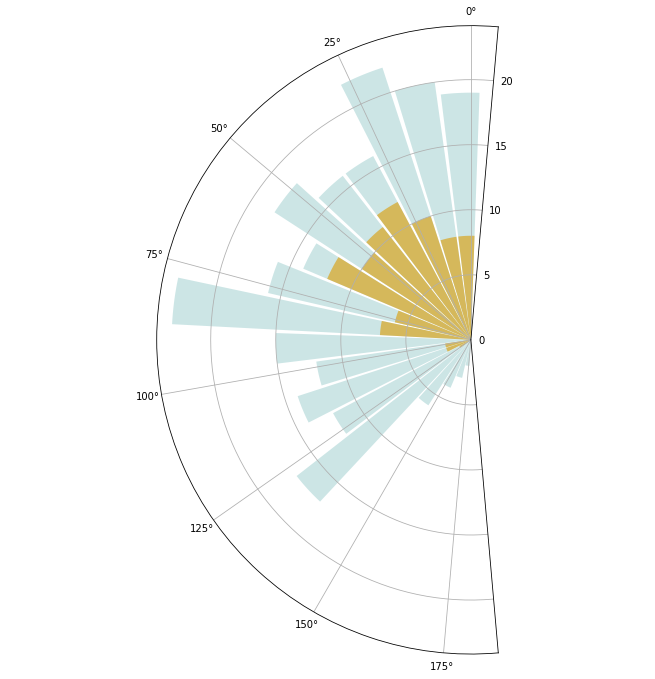

In [24]:
print (np.median(vectors_AllLegs['bang']))
print (np.std(vectors_AllLegs['bang']))


listoffiles = (vectors_AllRegions,vectors_AllLegs,)
plot_angles_polar(listoffiles,'All-Legs')

44.22154235839844
31.461031378361877


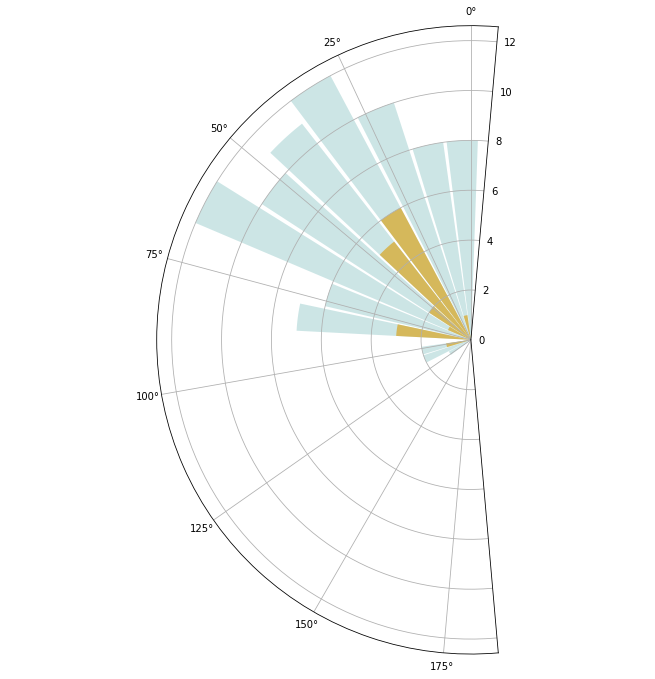

In [25]:
print (np.median(vectors_AllLegs['bang']))
print (np.std(vectors_AllLegs['bang']))


listoffiles = (vectors_AllLegs,vectors_Leg1a)
plot_angles_polar(listoffiles,'Legs-detail-1a')

122.3364086151123
19.729610206641112


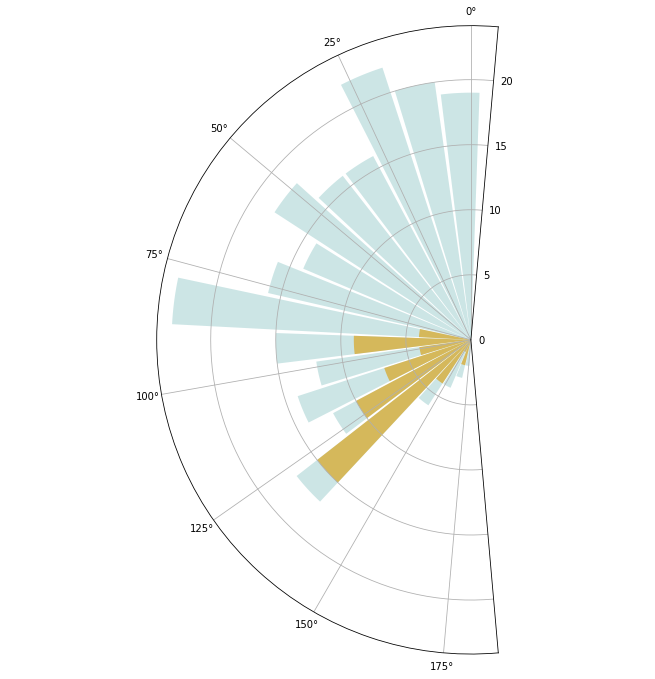

In [26]:
print (np.median(vectors_AllOutflows['bang']))
print (np.std(vectors_AllOutflows['bang']))


listoffiles = (vectors_AllRegions,vectors_AllOutflows,)
plot_angles_polar(listoffiles,'All-Outflows')

16.616085052490234
30.443611805212083


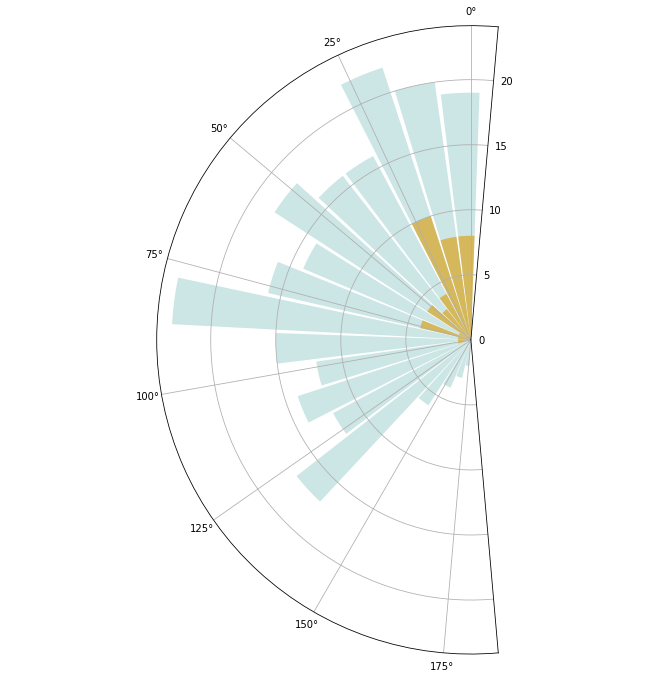

In [27]:
print (np.median(vectors_BellTop['bang']))
print (np.std(vectors_BellTop['bang']))

listoffiles = (vectors_AllRegions,vectors_BellTop)
plot_angles_polar(listoffiles,'All-BellTop')

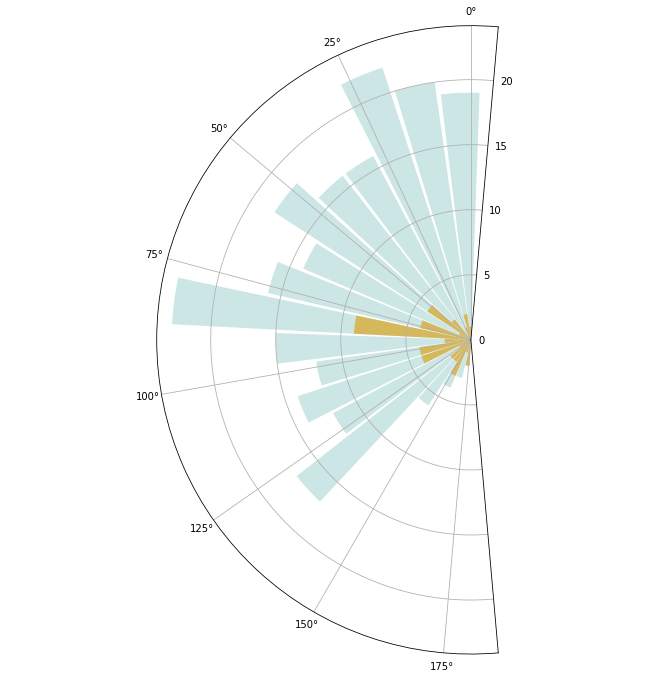

In [28]:
listoffiles = (vectors_AllRegions,vectors_AllOther)
plot_angles_polar(listoffiles,'All-Other')

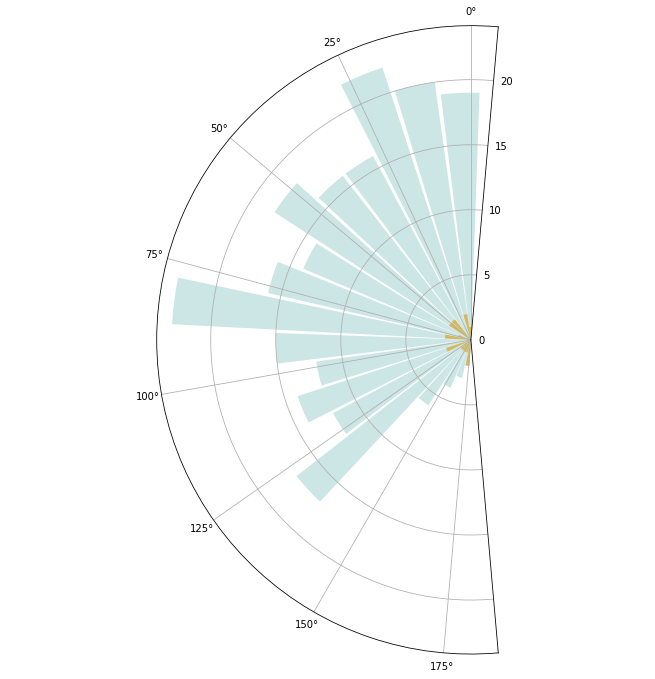

In [29]:
listoffiles = (vectors_AllRegions,vectors_Faint,)
plot_angles_polar(listoffiles,'All-Faint')

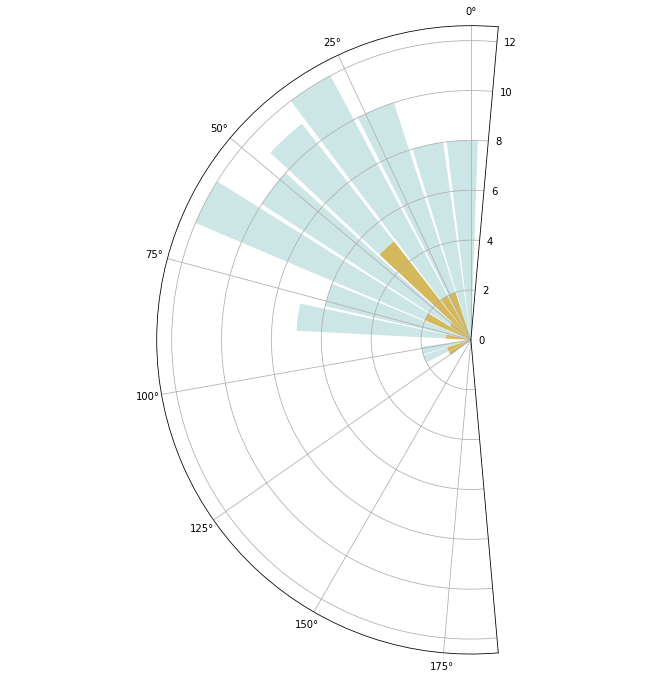

In [30]:
listoffiles = (vectors_AllLegs,vectors_Leg2a,)
plot_angles_polar(listoffiles,'All-detail-2a')

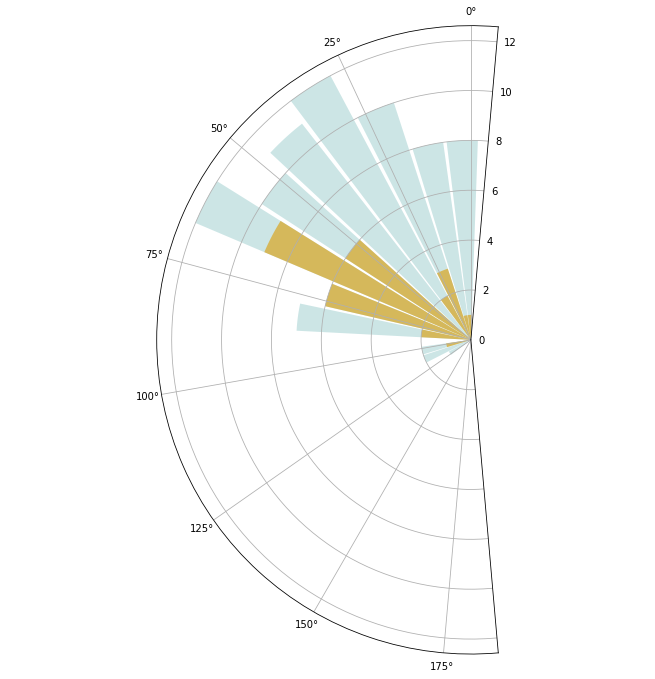

In [31]:
listoffiles = (vectors_AllLegs,vectors_Leg3aa,)
plot_angles_polar(listoffiles,'All-detail-3aa')

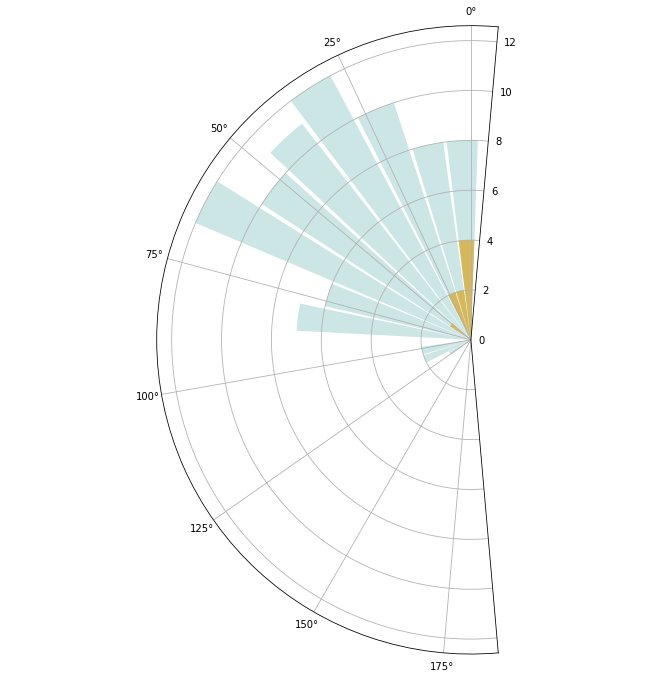

In [32]:
listoffiles = (vectors_AllLegs,vectors_Leg3b,)
plot_angles_polar(listoffiles,'Legs-detail-3b')

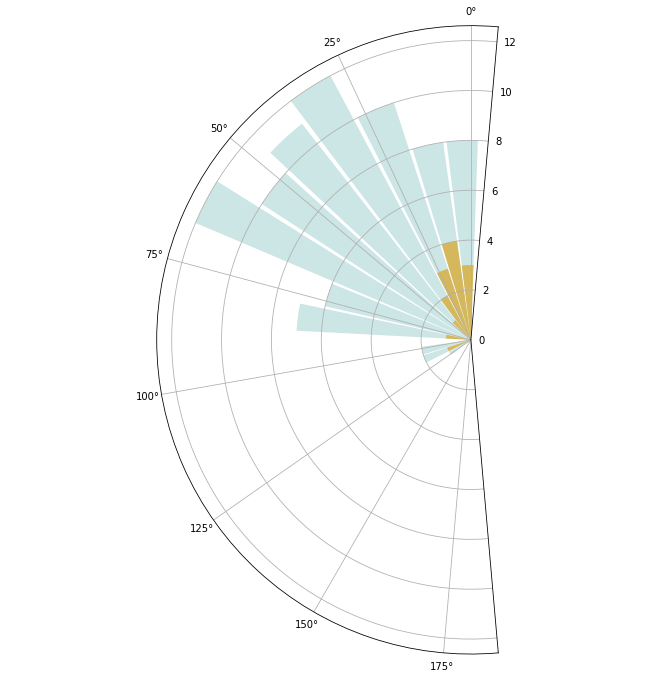

In [33]:
listoffiles = (vectors_AllLegs,vectors_Leg4a,)
plot_angles_polar(listoffiles,'Legs-detail-4a')

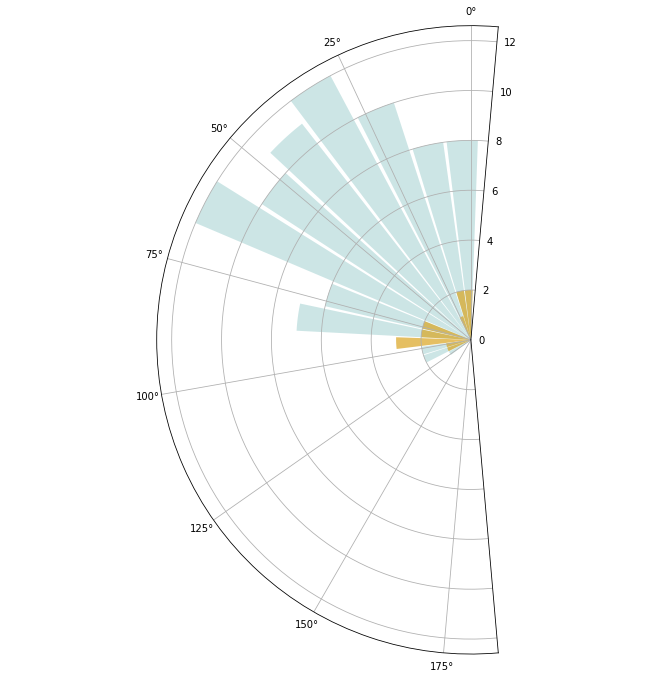

In [34]:
listoffiles = (vectors_AllLegs,vectors_Leg5a,)
plot_angles_polar(listoffiles,'Legs-detail-5a')

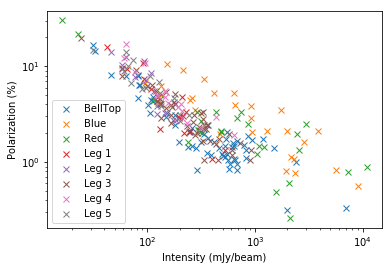

In [35]:
plt.figure()

xvalue = 'I'
yvalue = 'P'

x = vectors_All[xvalue]
y = vectors_All[yvalue]

x1 = vectors_BellTop[xvalue]
y1 = vectors_BellTop[yvalue]

x2 = vectors_BrightBlue[xvalue]
y2 = vectors_BrightBlue[yvalue]

x3 = vectors_BrightRed[xvalue]
y3 = vectors_BrightRed[yvalue]

x4 = vectors_Faint[xvalue]
y4 = vectors_Faint[yvalue]

x5 = vectors_Leg1a[xvalue]
y5 = vectors_Leg1a[yvalue]

x6 = vectors_Leg2a[xvalue]
y6 = vectors_Leg2a[yvalue]

x7 = vectors_Leg3a[xvalue]
y7 = vectors_Leg3a[yvalue]

x8 = vectors_Leg4a[xvalue]
y8 = vectors_Leg4a[yvalue]

x9 = vectors_Leg5a[xvalue]
y9 = vectors_Leg5a[yvalue]

plt.xlabel('Intensity (mJy/beam)')
plt.ylabel('Polarization (%)')

plt.loglog(x1, y1,marker='x',linestyle='None',label='BellTop')#, marker='o', color='orange', s=50, label='All vectors')
plt.loglog(x2, y2,marker='x',linestyle='None',label='Blue')#, marker='o', color='orange', s=50, label='All vectors')
plt.loglog(x3, y3,marker='x',linestyle='None',label='Red')#, marker='o', color='orange', s=50, label='All vectors')
# plt.loglog(x4, y4,marker='x',linestyle='None',label='Bell Bottom (Faint)')#, marker='o', color='orange', s=50, label='All vectors')
plt.loglog(x5, y5,marker='x',linestyle='None',label='Leg 1')#, marker='o', color='orange', s=50, label='All vectors')
plt.loglog(x6, y6,marker='x',linestyle='None',label='Leg 2')#, marker='o', color='orange', s=50, label='All vectors')
plt.loglog(x7, y7,marker='x',linestyle='None',label='Leg 3')#, marker='o', color='orange', s=50, label='All vectors')
plt.loglog(x8, y8,marker='x',linestyle='None',label='Leg 4')#, marker='o', color='orange', s=50, label='All vectors')
plt.loglog(x9, y9,marker='x',linestyle='None',label='Leg 5')#, marker='o', color='orange', s=50, label='All vectors')


plt.legend()#loc='upper right')

# plt.scatter(x6, y6, marker='o', color='blue', s=10, label='Other')


In [36]:
# want to make a method for fitting and plotting polarization efficiency plots:

def polarization_efficiency1(self,selfname): # calculates the B angle (POL-2 angle + 90)
    '''fitting and plotting polarization efficiency plots (I vs P)'''

    logx = np.log10(self['I'])
    logy = np.log10(self['PI'])

    z = np.polyfit(logx, logy, 1) # z,cov - > diag off the 
    f = np.poly1d(z)
    logx_fit = np.linspace(min(logx), max(logx), 50)
    logy_fit = f(logx_fit)
#     plt.plot(logx,logy,'o', logx_fit, logy_fit)
#     plt.title('')
#     plt.xlabel('log ()')
#     plt.ylabel('log()')
#     plt.show()
    print ('z:{}'.format(z))
#     print ('cov:{}'.format(cov))

    print ('\n{}\nfunction in log log space:{}'.format(selfname,f))
    b = f[1]
    loga = f[0]
    a = 10**loga
    print ('loga = {}, a = {}, b = {}'.format(loga,a,b))

    x1 = min(self['I'])
    x2 = max(self['I'])

    y1 = a * x1**(b)
    y2 = a * x2**(b)
    plt.loglog(self['I'],(self['P']),marker='x',linestyle='None',label=selfname)
    plt.loglog([x1,x2],[y1,y2])
    plt.xlabel('Intensity (mJy/beam)')
    plt.ylabel('Polarization (%)')
    plt.legend()#loc='upper right')
    
    try: # if on mac save here:
        plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-B-efficiency-{}.pdf'.format(selfname))
        plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-B-efficiency-{}.png'.format(selfname))
    except: # if on kukui save here:
        plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-B-efficiency-{}.pdf'.format(selfname))
        plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-B-efficiency-{}.png'.format(selfname))
 

z:[0.30205467 0.15381117]

All
function in log log space: 
0.3021 x + 0.1538
loga = 0.15381117409466055, a = 1.4249878916635135, b = 0.30205466611479337


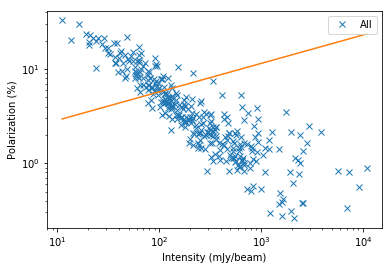

In [37]:
polarization_efficiency1(vectors_All,'All')



z:[-1.06508421  2.92447921]

Leg 1
function in log log space: 
-1.065 x + 2.924
loga = 2.924479214636458, a = 840.3867851685458, b = -1.065084205188688
z:[-1.18214967  3.15337538]

Leg 2
function in log log space: 
-1.182 x + 3.153
loga = 3.1533753841570187, a = 1423.558714117782, b = -1.1821496659587698
z:[-0.53752249  1.99071895]

Blue
function in log log space: 
-0.5375 x + 1.991
loga = 1.9907189533989613, a = 97.88563294688015, b = -0.5375224942651186
z:[-0.53965972  1.83347614]

Red
function in log log space: 
-0.5397 x + 1.833
loga = 1.833476140417892, a = 68.15161320755365, b = -0.5396597239574453


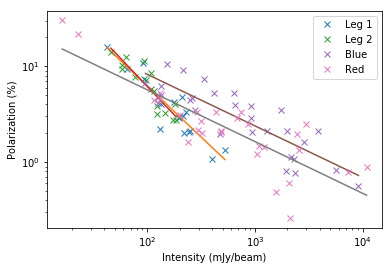

In [410]:
# polarization_efficiency1(vectors_All)
polarization_efficiency1(vectors_Leg1a,'Leg 1')
polarization_efficiency1(vectors_Leg2a,'Leg 2')
# polarization_efficiency1(vectors_Leg3a,'Leg 3')
# polarization_efficiency1(vectors_Leg4a,'Leg 4')
# polarization_efficiency1(vectors_Leg5a,'Leg 5')


# polarization_efficiency1(vectors_Leg1b,'connector 1')
# polarization_efficiency1(vectors_Leg2b,'connector 2')

polarization_efficiency1(vectors_BrightBlue,'Blue')
polarization_efficiency1(vectors_BrightRed,'Red')
# polarization_efficiency1(vectors_BellTop,'BellTop')

In [462]:
# want to make a method for fitting and plotting polarization efficiency plots:

def polarization_efficiency2(self,selfname): # calculates the B angle (POL-2 angle + 90)
    '''fitting and plotting total intensity vs
     polarization intensity plots (I vs PI)'''

    
    plt.errorbar(self['I'],self['PI'],xerr=self['DI'],yerr=self['DPI'],marker='o',linestyle='None',label=selfname)
    plt.xscale('log')# NOT    plt.set_xscale('log')
    plt.yscale('log')# NOT    plt.set_yscale('log')

#     plt.loglog([x1,x2],[y1,y2])
    plt.xlabel('Intensity (mJy/beam)')
    plt.ylabel('Polarizd Intensity (mJy/beam)')
    plt.legend()#loc='upper right')
    
    try: # if on mac save here:
        plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-B-efficiency2-{}.pdf'.format(selfname))
        plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-B-efficiency2-{}.png'.format(selfname))
    except: # if on kukui save here:
        plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-B-efficiency2-{}.pdf'.format(selfname))
        plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-B-efficiency2-{}.png'.format(selfname))
 

In [484]:
# want to make a method for fitting and plotting polarization efficiency plots:

def polarization_efficiency3(self,selfname): # calculates the B angle (POL-2 angle + 90)
    '''fitting and plotting total intensity vs
     polarization intensity plots (I vs PI)'''

    
    plt.errorbar(self['I'],self['P'],xerr=(self['DI']),yerr=self['DP'],marker='o',linestyle='None',label=selfname)
    plt.xscale('log')# NOT    plt.set_xscale('log')
    plt.yscale('log')# NOT    plt.set_yscale('log')

#     plt.loglog([x1,x2],[y1,y2])
    plt.xlabel('Intensity (mJy/beam)')
    plt.ylabel('Polarization (%)')
    plt.legend()#loc='upper right')
    
    try: # if on mac save here:
        plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-B-efficiency3-{}.pdf'.format(selfname))
        plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-B-efficiency3-{}.png'.format(selfname))
    except: # if on kukui save here:
        plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-B-efficiency3-{}.pdf'.format(selfname))
        plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-B-efficiency3-{}.png'.format(selfname))
 

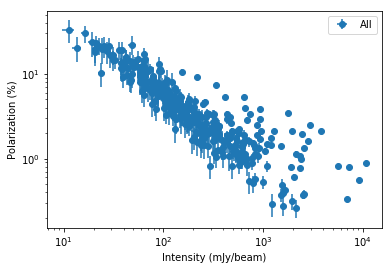

In [485]:
polarization_efficiency3(vectors_All,'All')


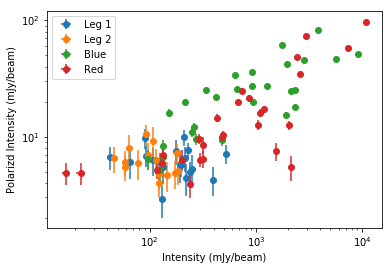

In [464]:
# polarization_efficiency2(vectors_All)
polarization_efficiency2(vectors_Leg1a,'Leg 1')
polarization_efficiency2(vectors_Leg2a,'Leg 2')
# polarization_efficiency2(vectors_Leg3a,'Leg 3')
# polarization_efficiency2(vectors_Leg4a,'Leg 4')
# polarization_efficiency2(vectors_Leg5a,'Leg 5')


# polarization_efficiency2(vectors_Leg1b,'connector 1')
# polarization_efficiency2(vectors_Leg2b,'connector 2')

polarization_efficiency2(vectors_BrightBlue,'Blue')
polarization_efficiency2(vectors_BrightRed,'Red')
# polarization_efficiency2(vectors_BellTop,'BellTop')

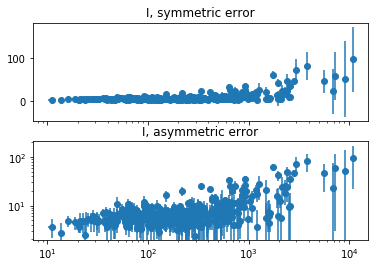

In [440]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = vectors_All['I']
y = vectors_All['PI']

# example error bar values that vary with x-position

erroriny = vectors_All['DI']
errorinx = vectors_All['DPI']
# error = 0.1 + 0.2 * x

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.errorbar(x, y, yerr=erroriny, xerr=errorinx, fmt='o')
ax0.set_title('I, symmetric error')

# error bar values w/ different -/+ errors that
# also vary with the x-position
lower_error = 0.4 * error
upper_error = error
asymmetric_error = [lower_error, upper_error]

ax1.errorbar(x, y, yerr=erroriny, xerr=errorinx, fmt='o')
ax1.set_title('I, asymmetric error')
ax1.set_yscale('log')
ax1.set_xscale('log')

plt.show()

In [422]:
vectors_All

X,Y,RA,DEC,I,DI,Q,DQ,U,DU,P,DP,ANG,DANG,PI,DPI,ldeg,bdeg,bang
pix,pix,RADIANS{HOURS},RADIANS{DEGREES},mJy / beam,mJy / beam,mJy / beam,mJy / beam,mJy / beam,mJy / beam,%,%,Degrees,Degrees,mJy / beam,mJy / beam,,,
float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64
-0.5,-21.5,4.671439551425891,-0.5052702739560346,90.42943,3.3536758,0.48448893,2.0225484,6.6466203,1.9029447,7.0625196,2.1227312,42.915466,8.69177,6.386596,1.9035965,0.5527966867610792,-0.9427913884806888,132.91546630859375
-2.5,-19.5,4.671393430160055,-0.5051107476878788,90.769196,2.2121665,9.114913,2.0350242,3.8943682,1.4862653,10.704302,2.176062,11.567355,4.5764847,9.716208,1.9603662,0.5594642990269134,-0.9361246608348612,101.56735515594482
-0.5,-19.5,4.671325339506081,-0.505210689258371,98.05533,3.2804167,3.5301194,1.9632832,-4.04451,1.0538663,5.252159,1.5564843,-24.442484,8.716516,5.150022,1.5156118,0.5527966819097367,-0.9361246723958833,65.55751609802246
-2.5,-18.5,4.67133632905067,-0.5050809549017148,125.80642,3.1227453,5.9456415,1.2442849,-1.4900084,1.8560606,4.7632966,1.0313363,-7.0344353,8.532522,5.992533,1.2885361,0.559464290710452,-0.9327913021512533,82.9655647277832
-4.5,-17.5,4.671347317019737,-0.5049512204823615,65.12783,2.3710265,-4.9837394,1.6455917,-3.882052,1.9275973,9.316918,2.72141,-71.04171,8.281671,6.067907,1.7574105,0.5661318874737352,-0.9294579189795301,18.958290100097656
-1.5,-17.5,4.671245183390351,-0.5051011301208937,42.161423,2.101413,6.775951,1.466402,-0.3632503,1.198842,15.714588,3.5677648,-1.5343089,5.064886,6.6254935,1.465705,0.5561304797468885,-0.929457950354879,88.46569108963013
0.5,-17.5,4.671177084894765,-0.5052010674292422,41.703556,2.077753,-4.869722,1.7430658,4.147028,1.8784311,14.71673,4.3861513,69.79123,8.163852,6.1374,1.801208,0.5494628743511043,-0.9294579555407043,159.79122924804688
1.5,-17.5,4.6711430328239425,-0.5052510353469446,27.269714,2.1421425,-5.196949,1.4341848,-0.56647825,1.584028,18.433002,5.4771333,-86.889595,8.671258,5.026627,1.4360349,0.5461290716475897,-0.9294579534143401,3.1104049682617188


In [ ]:
#Steve suggested polar plot: this is known as a rose diagram.
# if median error is 6deg then maybe plot rose diagram into 5deg ranges

import numpy as np
import matplotlib.cm as cm
from matplotlib.pyplot import figure, show, rc


# force square figure and square axes, looks better for polar
fig = figure(figsize=(8,8))

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True) # l,b,w,h

variable = 'bang'

listoffiles = (vectors_Leg1a,vectors_Leg2a,vectors_Leg3aa,vectors_Leg3b,vectors_Leg4a,vectors_Leg5a,vectors_BrightBlue,vectors_BrightRed,vectors_BellTop,vectors_Faint)

theta_value = []
theta_sigma = []
theta_polarization = []

for x in range(len(listoffiles)):
    vectorfile = listoffiles[x]
    angles = vectorfile[variable] # angle either from POL-2 or rotated by 90dgrees - Position
    dangles =  vectorfile['DANG'] # error in angles - Width
    percentage = vectorfile['P'] # percentage polarization - Length
    
    angles_median_deg = np.median(angles)
    angles_median_rad = np.radians(angles_median_deg)
    theta_value.append(angles_median_rad)
    
    angles_std_deg = np.std(dangles)
    angles_median_rad = np.radians(angles_std_deg)
    theta_sigma.append(angles_median_rad)
    
    polarization = np.median(percentage)
    theta_polarization.append(polarization)
    
#     print (angles_median_rad)

#     print (theta_value,theta_sigma,theta_polarization)


    theta = theta_value
    radii = theta_polarization
    width = theta_sigma


bars = ax.bar(theta, radii, width=width, bottom=0.0)


# # Use custom colors and opacity
# for r, bar in zip(radii, bars):
#     bar.set_facecolor(plt.cm.jet(r / 10.)) # viridis or jet is a colour selection
#     bar.set_alpha(0.5)

show()


# https://stackoverflow.com/questions/32232285/how-to-change-ticklabels-within-figure-created-with-axisartist?lq=1

5 5


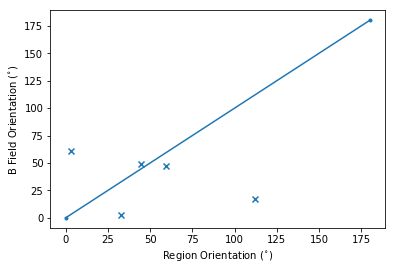

In [500]:
region_anlge = ((thetapol2_Leg1a-90),(thetapol2_Leg2a-90),(thetapol2_Leg3aa-90),(thetapol2_Leg3b-90),(thetapol2_Leg4a+90))
region_median = (np.median(vectors_Leg1a['bang']), np.median(vectors_Leg2a['bang']), np.median(vectors_Leg3aa['bang']),np.median(vectors_Leg3b['bang']),np.median(vectors_Leg4a['bang'])) 

print (len(region_anlge),len(region_median))

plt.scatter(region_anlge,region_median,marker='x',linestyle='None')
x=(0,180)
y=x
plt.plot(x,y,marker='.',linestyle='-')


plt.ylabel('B Field Orientation ($^{\circ}$)')
plt.xlabel('Region Orientation ($^{\circ}$)')

try: # if on mac save here:
    plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-B-angles-summary.pdf')
    plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-B-angles-summary.png')
except: # if on kukui save here:
    plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-B-angles-summary.pdf')
    plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-B-angles-summary.png')

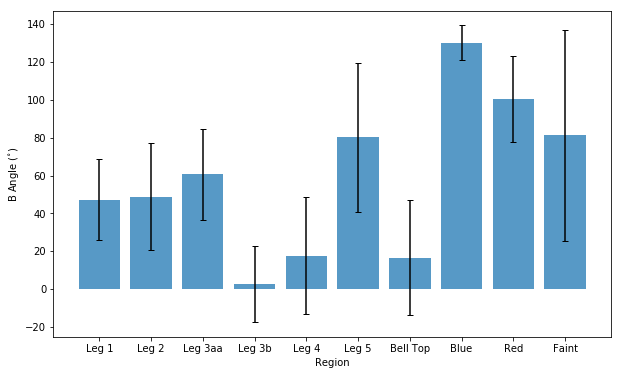

In [45]:
# n_groups = 10

# variable= 'bang'

# region_median = (np.median(vectors_Leg1a[variable]), np.median(vectors_Leg2a[variable]), np.median(vectors_Leg3aa[variable]), np.median(vectors_Leg3b[variable]), np.median(vectors_Leg4a[variable]), np.median(vectors_Leg5a[variable]), np.median(vectors_BellTop[variable]), np.median(vectors_BrightBlue[variable]), np.median(vectors_BrightRed[variable]), np.median(vectors_Faint[variable]))
# region_std = (np.std(vectors_Leg1a[variable]), np.std(vectors_Leg2a[variable]), np.std(vectors_Leg3aa[variable]), np.std(vectors_Leg3b[variable]), np.std(vectors_Leg4a[variable]), np.std(vectors_Leg5a[variable]), np.std(vectors_BellTop[variable]), np.std(vectors_BrightBlue[variable]), np.std(vectors_BrightRed[variable]),np.std(vectors_Faint[variable]))

# index = np.arange(n_groups)


# region_names = ('Leg 1', 'Leg 2', 'Leg 3aa', 'Leg 3b', 'Leg 4', 'Leg 5', 'Bell Top','Blue', 'Red','Faint')
# plt.figure(figsize=(10,6))

# plt.bar(index, region_median, align='center', alpha=0.75, yerr=region_std, capsize=3)
# plt.xticks(index, region_names)
# plt.ylabel('B Angle ($^{\circ}$)')
# plt.xlabel('Region')

# #plt = figure(figsize=(8,8))



# try: # if on mac save here:
#     plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-B-angles-summary.pdf')
#     plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-B-angles-summary.png')
# except: # if on kukui save here:
#     plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-B-angles-summary.pdf')
#     plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-B-angles-summary.png')